# Lab 5 - General Linear Models: Logistic regression

In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

#### Read data from csv file

In [2]:
data = pd.read_csv('logistic_reg_data.csv', index_col=0, header=0)
data.describe()

,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


### Prior selection


In [3]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:compiling stan file E:\Obiekty 3D\GitHub\Data-Analytics-2022---Jan-Sawicki\Labolatory 05\logistic_regression_ppc.stan to exe file E:\Obiekty 3D\GitHub\Data-Analytics-2022---Jan-Sawicki\Labolatory 05\logistic_regression_ppc.exe
INFO:cmdstanpy:compiled model executable: E:\Obiekty 3D\GitHub\Data-Analytics-2022---Jan-Sawicki\Labolatory 05\logistic_regression_ppc.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Jasio/AppData/Local/Temp/tmpw_svimij/tmpr10yuewe.hpp C:/Users/Jasio/AppData/Local/Temp/tmpw_svimij/tmpr10yuewe.stan
Warning in 'C:/Users/Jasio/AppData/Local/Temp/tmpw_svimij/tmpr10yuewe.stan', line 16, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-f

In [4]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


#### Task 1.

1. Plot histograms of beta for prior model
2. Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.
3. Consider which result should be taken into account when selecting prior.

In [ ]:
# Wypisanie kluczy wynikowych
print(sim_ppc1.stan_variables().keys())

dict_keys(['prob_pcc', 'beta', 'alpha'])


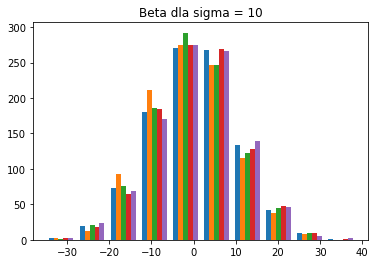

In [10]:
# Task 1.1
plt.hist(sim_ppc1.stan_variable('beta'), bins=10)
plt.title('Beta dla sigma = 10')
plt.show() # Pokazuje 5 kolorów ponieważ beta(list(list(float, float, float, float, float)))

In [ ]:
# Task 1.2
# Generowanie danych dla innych sigma
sigma = [5, 2, 0.75, 0.1]
data_ppc_2 = []
sim_ppc_2 = []

for i in range(len(sigma)):
    print('sigma (', type(sigma[i]), '):', sigma[i])
    data_ppc_2.append(
        dict(N = data.shape[0], M = 5, X = data.iloc[:,0:5].values,sigma=sigma[i])
    )
    sim_ppc_2.append(
        model_ppc1.sample(data=data_ppc_2[i], 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)
    )

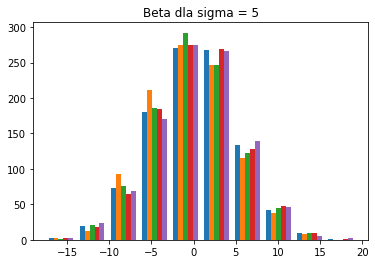

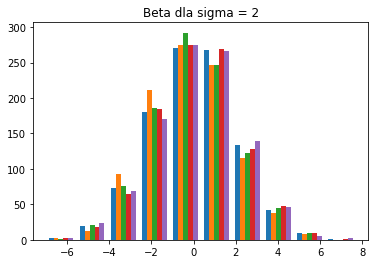

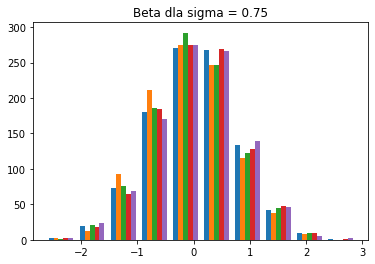

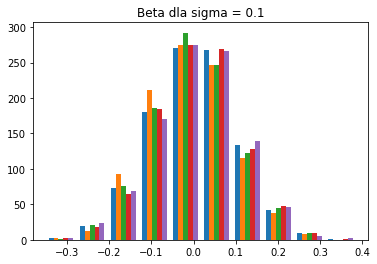

In [19]:
# Plotowanie histogramów
for i in range(len(sim_ppc_2)):
    plt.hist(sim_ppc_2[i].stan_variable('beta'), bins=10)
    plt.title('Beta dla sigma = ' + str(sigma[i]))
    plt.show()

In [ ]:
'''
Wyniki wyglądają właściwie identycznie więc powinno być obojętne jest który użyjemy.
'''

### Posterior inference

In [12]:
model = CmdStanModel(stan_file='logistic_regression.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [13]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status

chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:03 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%] 


INFO:cmdstanpy:CmdStan done processing.


In [17]:
#plot
print(fit.stan_variables().keys())
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])

dict_keys(['beta', 'alpha', 'y_pcc', 'prob_ppc'])


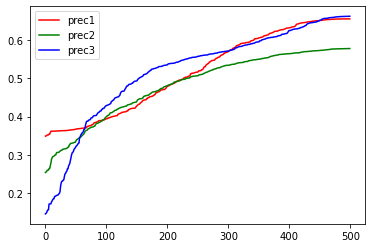

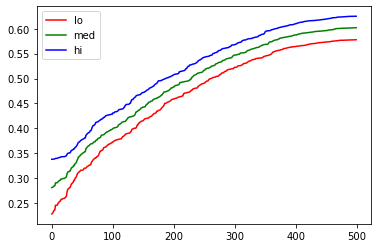

In [26]:
# print(fit.stan_variable('prob_ppc'))
# print(med_prob_ppc)
# print(estimate_ppc_df)

x = [i for i in range(len(fit.stan_variable('prob_ppc')[0]))]
plt.plot(x, sorted(fit.stan_variable('prob_ppc')[0]), 'r')
plt.plot(x, sorted(fit.stan_variable('prob_ppc')[1]), 'g')
plt.plot(x, sorted(fit.stan_variable('prob_ppc')[2]), 'b')
plt.legend(['prec1', 'prec2', 'prec3'])
plt.show()

x = [i for i in range(len(estimate_ppc_df['lo']))]
plt.plot(x, sorted(estimate_ppc_df['lo']), 'r')
plt.plot(x, sorted(estimate_ppc_df['med']), 'g')
plt.plot(x, sorted(estimate_ppc_df['hi']), 'b')
plt.legend(['lo', 'med', 'hi'])
plt.show()

#### Task 2.

1. Edit stan model and create models with different priors. Use original setting and some priors from task 1.
2. Fit the model
3. Plot the probability of individual outcome:
- plot generated paramether theta (prob_pcc): mean with its error bars (plt.errorbar)
- to plot its error bars take into consider its 25th, 50th and 75th percentile
- also mark the real value of y, by different colored dots (for mean values)
    
4. Consider if the probability was well captured by each setting